<a href="https://colab.research.google.com/github/perinbanathan/ardupilot/blob/master/Snn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
pip install snntorch

In [74]:
import snntorch as snn
import torch

In [75]:
batch_size = 128
data_path = '/data/mnist'
num_classes = 10

dtype  = torch.float

In [76]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.Resize((28,28)),transforms.Grayscale(),transforms.ToTensor(),transforms.Normalize((0,),(1,))])
mnist_train = datasets.MNIST(data_path, train=True, download=True, transform = transform)

In [77]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)

In [78]:
print(f"The size of mnist_train is {len(mnist_train)}")

The size of mnist_train is 6000


In [79]:
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle = True)

In [80]:
num_steps = 100
raw_vector = torch.ones(num_steps)*0.5
rate_coded_vector = torch.bernoulli(raw_vector)

In [81]:
print(f"Converted vector: {rate_coded_vector}")

Converted vector: tensor([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 0.])


In [82]:
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

The output is spiking 44.00% of the time.


In [83]:
import pandas as pd

df = pd.DataFrame(rate_coded_vector)
df.to_csv('myfile.csv')

In [84]:
from snntorch import spikegen
data = iter(train_loader)
data_it, targets_it = next(data)
spike_data = spikegen.rate(data_it, num_steps=num_steps)

In [85]:
print(spike_data.size())

torch.Size([100, 128, 1, 28, 28])


In [86]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

In [87]:
spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

torch.Size([100, 28, 28])


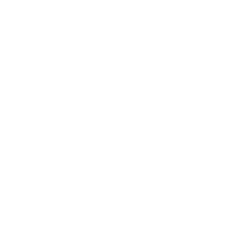

In [88]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
HTML(anim.to_html5_video())

In [89]:
anim.save("spike_mnist_test.mp4")

In [90]:
print(f"The corresponding target is: {targets_it[0]}")

The corresponding target is: 2


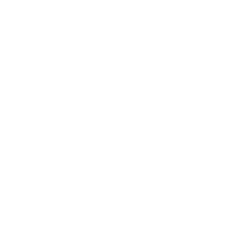

In [91]:
spike_data = spikegen.rate(data_it, num_steps=num_steps, gain=0.25)
spike_data_sample2 = spike_data[:, 0, 0]
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample2, fig, ax)
HTML(anim.to_html5_video())

In [92]:
anim.save("spike_mnist_test2.mp4")

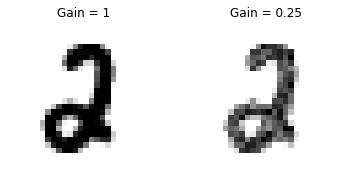

In [93]:
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((28,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 1')
plt.subplot(1,2,2)
plt.imshow(spike_data_sample2.mean(axis=0).reshape((28,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 0.25')
plt.show()

In [94]:
spike_data_sample2 = spike_data_sample2.reshape((num_steps, -1))

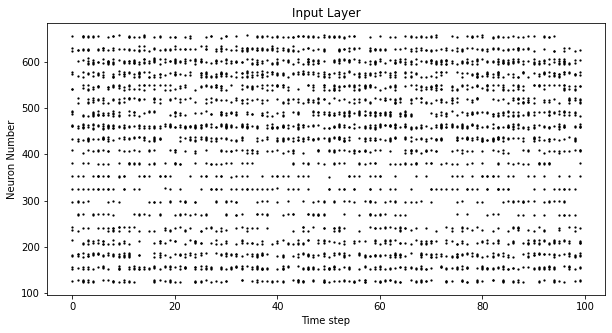

In [95]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample2, ax, s=1.5, c="black")
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

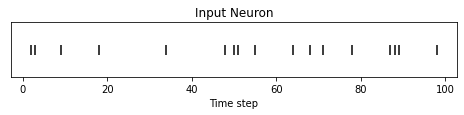

In [96]:
idx = 210 
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample.reshape(num_steps, -1)[:, idx].unsqueeze(1), ax, s=100,c="black", marker="|")
plt.title("Input Neuron")
plt.xlabel("Time step")
plt.yticks([])
plt.show()